In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("/Users/netrakc/Desktop/Data-Science/MachineLearning_Algorithms/KNearestNeighbors/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print(df.shape)

(214, 10)


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
# Dropping the duplicates values. 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable.
X = df.drop('Type', axis=1)
y = df['Type']

# Split the data into training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Implementing the MinMaxScaler.
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # since we don't want to calculate the mean for the test dataset so that.. transform() will apply. 

In [20]:
# Selecting the vaue of k. 
import math
n = df.shape[0] # df contains 213 rows so taking the sqrt of 213 as value of the k => 14.594519519326424. 
k_max = math.sqrt(n)
print("Max value of k: ", k_max)

# Creating a model function. 

def knn_function(train_x, train_label, test_x, k):
    '''
        train_x --> train features. 
        train_label --> train targets.
        test_x --> validation data (features).
        k --> nearest neighbouurs <int>
    '''
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction

Max value of k:  14.594519519326424


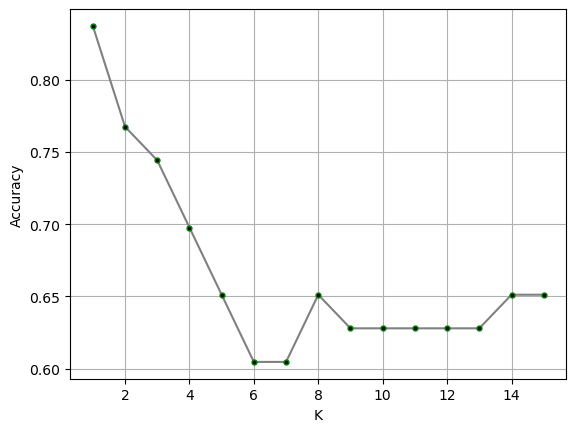

In [29]:
from sklearn.metrics import accuracy_score

normal_accuracy = []
k_values = range(1,16)

for k in k_values :
    y_pred = knn_function(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()